# Light Gradient Boosting Machine (LightGBM) Model


In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
Merged_data = pd.read_excel('Merged_data.xlsx')
Merged_data.set_index('Date', inplace=True)

In [24]:
Merged_data

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),Turbidity
Date,,,,,,,,,,
2020-12-31 15:00:00,4.0,78,0.0,0.05,9.8,20.5,4.4,0.391,55,0.430411
2020-12-31 16:00:00,3.4,85,0.0,0.02,5.6,18.4,4.1,0.391,25,0.522836
2020-12-31 17:00:00,1.5,94,0.0,0.01,7.3,9.7,3.5,0.390,3,0.512069
2020-12-31 18:00:00,0.8,95,0.0,0.00,7.1,9.4,2.9,0.389,0,0.450545
2020-12-31 19:00:00,-0.1,97,0.0,0.00,8.4,10.4,2.3,0.388,0,0.405494
...,...,...,...,...,...,...,...,...,...,...
2023-12-30 05:00:00,6.9,90,0.0,0.01,21.5,37.4,7.3,0.399,0,0.455236
2023-12-30 06:00:00,6.9,90,0.0,0.01,21.4,36.7,7.1,0.399,0,0.398240
2023-12-30 07:00:00,6.7,91,0.0,0.00,19.0,36.4,7.0,0.398,0,0.413984


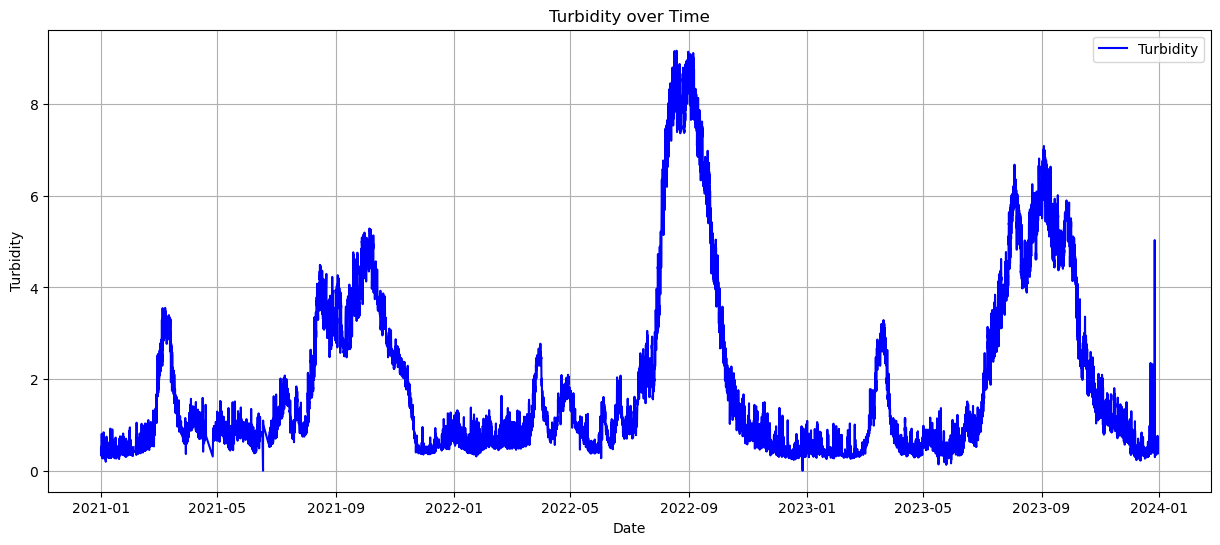

In [25]:
plt.figure(figsize=(15,6))
plt.plot(Merged_data.index, Merged_data['Turbidity'], label='Turbidity', color='blue')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.title('Turbidity over Time')
plt.legend()
plt.grid()
plt.show()

In [26]:
# Anomaly detection 
# import numpy as np

# Q1 = Merged_data['Turbidity'].quantile(0.25)
# Q3 = Merged_data['Turbidity'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# Detect anomalies
# Merged_data['is_anomaly'] = (Merged_data['Turbidity'] < lower_bound) | (Merged_data['Turbidity'] > upper_bound)


In [27]:
# Plot anomalies
# plt.figure(figsize=(15,6))
# plt.plot(Merged_data.index, Merged_data['Turbidity'], label='Turbidity')
# plt.scatter(Merged_data[Merged_data['is_anomaly']].index, Merged_data[Merged_data['is_anomaly']]['Turbidity'], color='red', label='Anomalies')
# plt.xlabel('Date')
# plt.ylabel('Turbidity')
# plt.title('Turbidity with Anomalies')
# plt.legend()
# plt.grid()
# plt.show()

In [28]:
# Replace anmalies with imputation
# Merged_data['Turbidity'] = Merged_data['Turbidity'].mask(Merged_data['is_anomaly'], np.nan)
# Interpolate missing values
# Merged_data['Turbidity'] = Merged_data['Turbidity'].interpolate(method='linear')
# Drop the is_anomaly column
# Merged_data.drop(columns=['is_anomaly'], inplace=True)
# Check for missing values
# print(Merged_data.isnull().sum())

In [29]:
# Merged_data.interpolate(method='linear', inplace=True)

In [30]:
Merged_data.isnull().sum()

temperature_2m (°C)                0
relative_humidity_2m (%)           0
precipitation (mm)                 0
et0_fao_evapotranspiration (mm)    0
wind_speed_10m (km/h)              0
wind_gusts_10m (km/h)              0
soil_temperature_0_to_7cm (°C)     0
soil_moisture_0_to_7cm (m³/m³)     0
direct_radiation (W/m²)            0
Turbidity                          0
dtype: int64

In [31]:
Merged_data

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),Turbidity
Date,,,,,,,,,,
2020-12-31 15:00:00,4.0,78,0.0,0.05,9.8,20.5,4.4,0.391,55,0.430411
2020-12-31 16:00:00,3.4,85,0.0,0.02,5.6,18.4,4.1,0.391,25,0.522836
2020-12-31 17:00:00,1.5,94,0.0,0.01,7.3,9.7,3.5,0.390,3,0.512069
2020-12-31 18:00:00,0.8,95,0.0,0.00,7.1,9.4,2.9,0.389,0,0.450545
2020-12-31 19:00:00,-0.1,97,0.0,0.00,8.4,10.4,2.3,0.388,0,0.405494
...,...,...,...,...,...,...,...,...,...,...
2023-12-30 05:00:00,6.9,90,0.0,0.01,21.5,37.4,7.3,0.399,0,0.455236
2023-12-30 06:00:00,6.9,90,0.0,0.01,21.4,36.7,7.1,0.399,0,0.398240
2023-12-30 07:00:00,6.7,91,0.0,0.00,19.0,36.4,7.0,0.398,0,0.413984


In [32]:
# Replace NaN values with the mean of the column
# Merged_data.fillna(Merged_data.mean(), inplace=True)


In [33]:
# Create lag features
lags = [1, 3, 6, 12, 24]
for col in ['Turbidity']:
    for lag in lags:
        Merged_data[f'{col}_lag_{lag}'] = Merged_data[col].shift(lag)

# Create rolling features
rolling_windows = [1*24, 2*24, 3*24]
for col in ['Turbidity']:
    for window in rolling_windows:
        Merged_data[f'{col}_rolling_mean_{window}'] = Merged_data[col].rolling(window=window).mean()

In [34]:
X = Merged_data.drop(columns=['Turbidity'])
y = Merged_data['Turbidity']

train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.1)
test_size = len(X) - train_size - val_size
X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

In [35]:
# Fit the lightgbm model
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define the model
model = lgb.LGBMRegressor()
# Define the parameter grid
param_grid = {
    'num_leaves': [10],
    'max_depth': [-1],
    'learning_rate': [0.05],
    'n_estimators': [100]
}


In [36]:
# param_grid = {
    #'num_leaves': [10, 20, 30, 40, 50],
    #'max_depth': [-1, 10, 20],
    #'learning_rate': [0.01, 0.05, 0.1, 0.5],
    #'n_estimators': [100, 200]
#}


In [37]:

# Perform grid search on validation set
# grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)

In [38]:
# Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

In [39]:
best_params = {
    'num_leaves': 10,
    'max_depth': -1,
    'learning_rate': 0.05,
    'n_estimators': 100
}

In [40]:
# Train the model with the best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001864 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3708
[LightGBM] [Info] Number of data points in the train set: 18375, number of used features: 17
[LightGBM] [Info] Start training from score 1.742104


LGBMRegressor(learning_rate=0.05, num_leaves=10)

In [41]:

# Make predictions on the test set
y_pred = model.predict(X_test)

In [42]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")

MAE: 0.10903720202046538
MSE: 0.03170049824696955
R2: 0.9923423403947702
MAPE: 0.07105908912459305


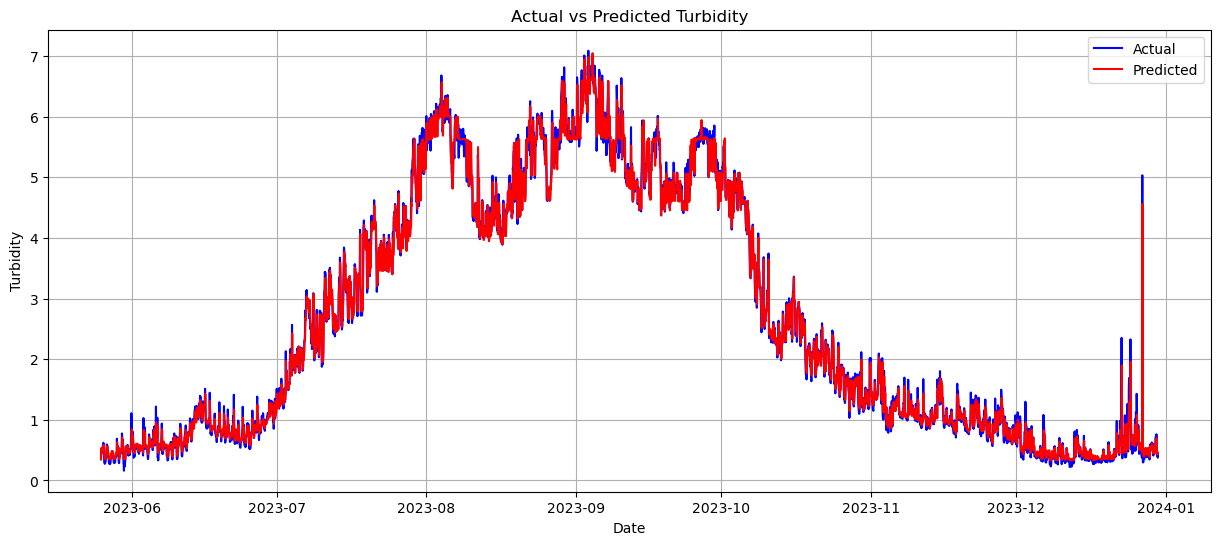

In [43]:
plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.title('Actual vs Predicted Turbidity')
plt.legend()
plt.grid()
plt.show()

Validation MAE: 0.056476691753766683
Validation MSE: 0.007040231386560234
Validation R2: 0.9858773725576588
Validation MAPE: 0.09022271589257233


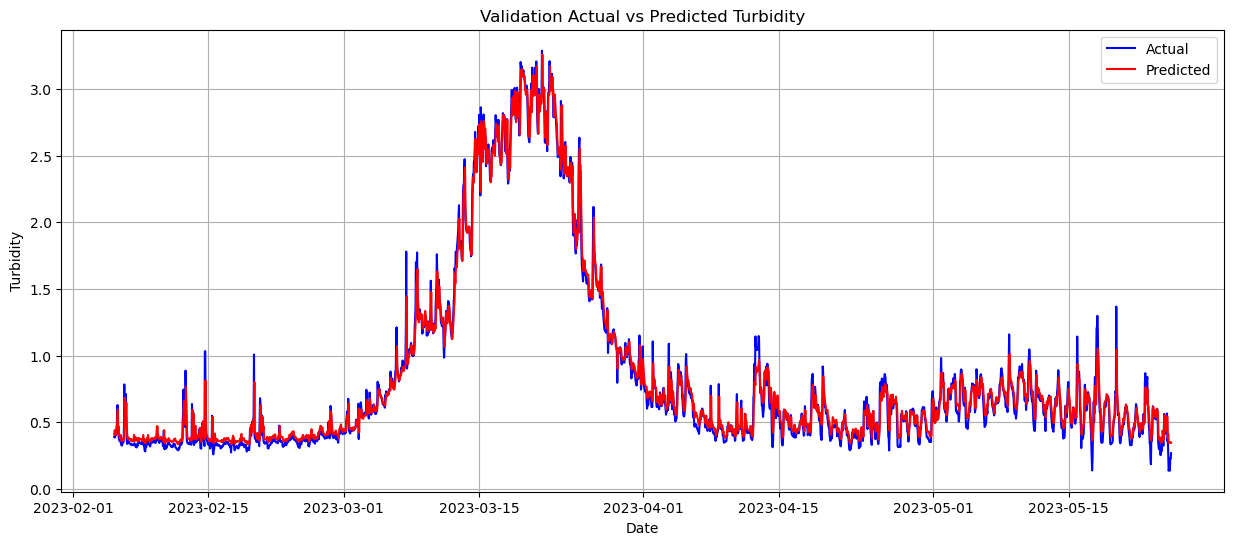

In [44]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)
# Evaluate the model on the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
print(f"Validation MAE: {mae_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation R2: {r2_val}")
print(f"Validation MAPE: {mape_val}")
# Plot the validation predictions
plt.figure(figsize=(15,6))
plt.plot(y_val.index, y_val, label='Actual', color='blue')
plt.plot(y_val.index, y_val_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.title('Validation Actual vs Predicted Turbidity')
plt.legend()
plt.grid()
plt.show()

Training MAE: 0.07550534948462538
Training MSE: 0.01351290825725843
Training R2: 0.996254222074729
Training MAPE: 281506247842.5022


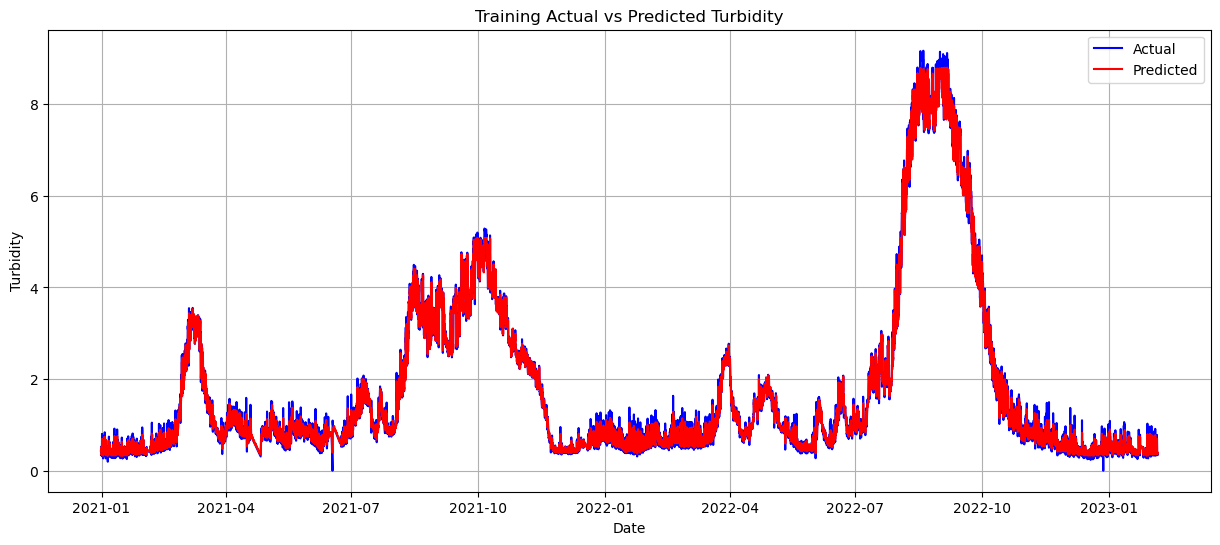

In [45]:

# Make predictions on the training set
y_train_pred = model.predict(X_train)
# Evaluate the model on the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
print(f"Training MAE: {mae_train}")
print(f"Training MSE: {mse_train}")
print(f"Training R2: {r2_train}")
print(f"Training MAPE: {mape_train}")

# Plot the training predictions
plt.figure(figsize=(15,6))
plt.plot(y_train.index, y_train, label='Actual', color='blue')
plt.plot(y_train.index, y_train_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.title('Training Actual vs Predicted Turbidity')
plt.legend()
plt.grid()
plt.show()






# Without feature engineering 


In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt


In [47]:
Merged_data = pd.read_excel('Merged_data.xlsx')
Merged_data.set_index('Date', inplace=True)

In [48]:
Merged_data.interpolate(method='linear', inplace=True)

In [49]:
X = Merged_data.drop(columns=['Turbidity'])
y = Merged_data['Turbidity']

train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.1)
test_size = len(X) - train_size - val_size
X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

In [50]:
# Fit the lightgbm model
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define the model
model = lgb.LGBMRegressor()
# Define the parameter grid
param_grid = {
    'num_leaves': [10,],
    'max_depth': [-1],
    'learning_rate': [0.05],
    'n_estimators': [100]
}


In [51]:
best_params = {
    'num_leaves': 10,
    'max_depth': -1,
    'learning_rate': 0.05,
    'n_estimators': 100
}


In [52]:
# Train the model with the best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 18375, number of used features: 9
[LightGBM] [Info] Start training from score 1.742104


LGBMRegressor(learning_rate=0.05, num_leaves=10)

In [53]:

# Make predictions on the test set
y_pred = model.predict(X_test)

In [54]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"MAPE: {mape}")

MAE: 1.4069701829759542
MSE: 3.4319296338676133
R2: 0.17097363200683324
MAPE: 0.8684513138251359


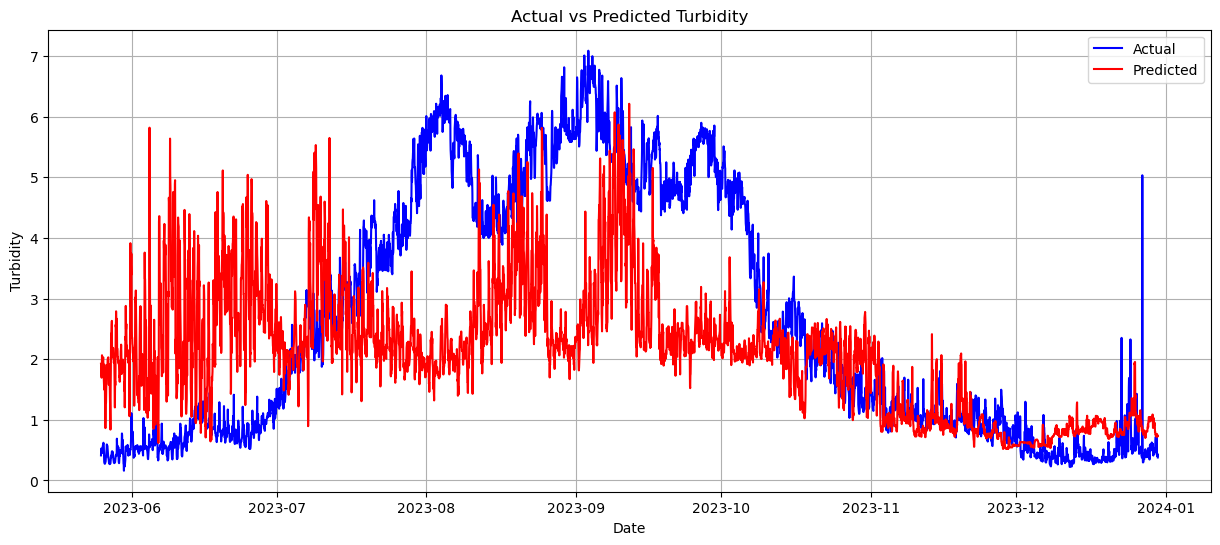

In [55]:
plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.title('Actual vs Predicted Turbidity')
plt.legend()
plt.grid()
plt.show()

Validation MAE: 0.985892959352396
Validation MSE: 1.2489732395198547
Validation R2: -1.5054267081143422
Validation MAPE: 1.7457180958732745


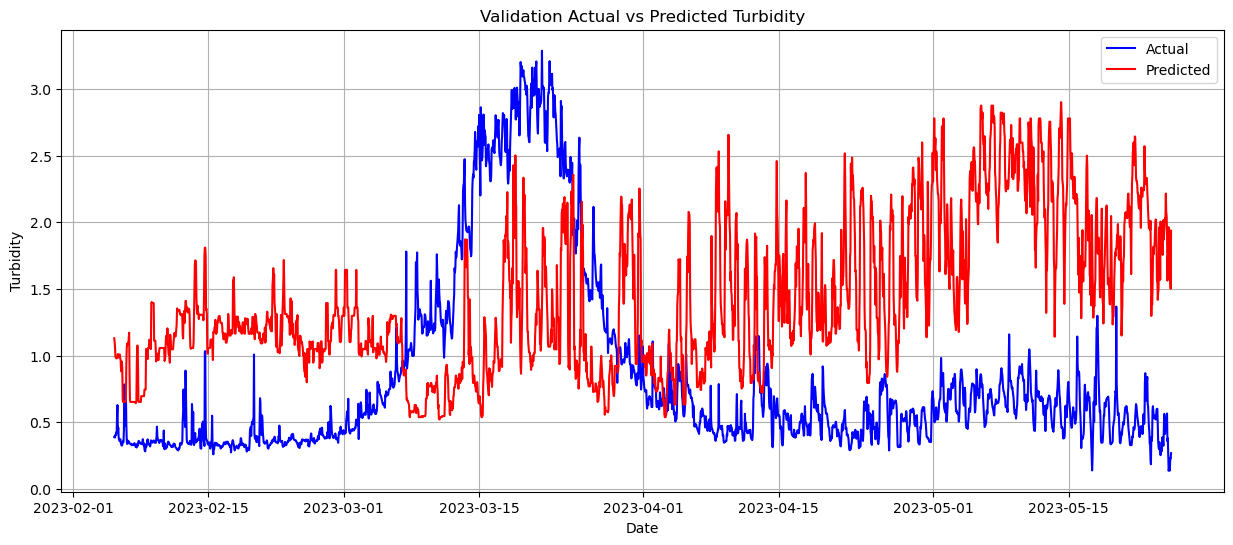

In [56]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)
# Evaluate the model on the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
print(f"Validation MAE: {mae_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation R2: {r2_val}")
print(f"Validation MAPE: {mape_val}")
# Plot the validation predictions
plt.figure(figsize=(15,6))
plt.plot(y_val.index, y_val, label='Actual', color='blue')
plt.plot(y_val.index, y_val_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.title('Validation Actual vs Predicted Turbidity')
plt.legend()
plt.grid()
plt.show()

Training MAE: 1.0230831581227098
Training MSE: 2.183639974412004
Training R2: 0.39469503846455023
Training MAPE: 847879494361.0427


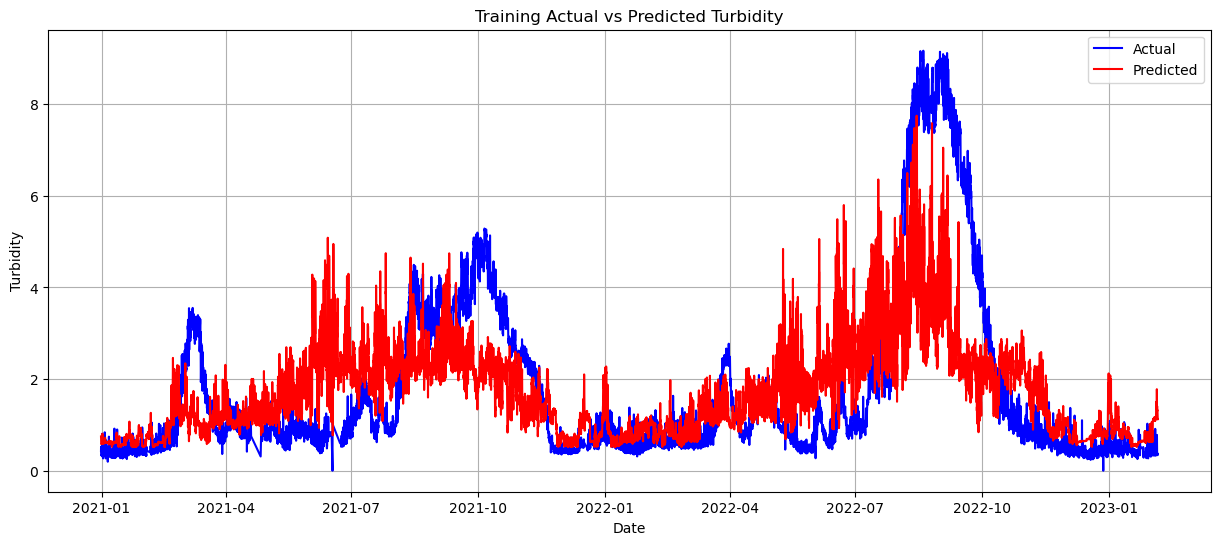

In [57]:

# Make predictions on the training set
y_train_pred = model.predict(X_train)
# Evaluate the model on the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
print(f"Training MAE: {mae_train}")
print(f"Training MSE: {mse_train}")
print(f"Training R2: {r2_train}")
print(f"Training MAPE: {mape_train}")

# Plot the training predictions
plt.figure(figsize=(15,6))
plt.plot(y_train.index, y_train, label='Actual', color='blue')
plt.plot(y_train.index, y_train_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Turbidity')
plt.title('Training Actual vs Predicted Turbidity')
plt.legend()
plt.grid()
plt.show()